# Exploring the Law of Large Numbers: An Analysis of Male Heights in Australia (1850-1970)

## Introduction
The Law of Large Numbers (LLN) states that as the sample size increases, the sample mean tends to converge towards the population mean. In this notebook, we will explore the application of LLN using a dataset containing the heights of men in Australia over a period of 120 years (1850-1970). We will collate the data, calculate the mean height for the entire period, and then sample a smaller period to compare the sample mean with the original mean. This analysis will help us understand how the sample mean relates to the population mean as the sample size increases.


*Plan :*

1. Create (collate) a dataset that contains the heights of men for a period - lets say 10-15 years
2. find the mean of height for this period.
3. sample a smaller period from the collated dataset
4. find the mean of the smaller period 
5. According to LLN the mean should be indicative of the original mean from the collated dataset.
6. optional. create beautiful viz.

Create (collate) a dataset that contains the heights of men for a period - lets say 10-15 years

- heights.csv has average height of men in Australia from 1850 to 1970 (120 years) among other countries. description: Average height of men by year of birth, 1810 to 1980. Link: https://ourworldindata.org/grapher/average-height-of-men-for-selected-countries?tab=table

- Create a separate dataset that contains 120 year (interval: 10 y) height data of Australian Men.

### Data Cleaning and Preprocessing

In [2]:
height_data <- read.csv("heights.csv")
summary(height_data)
str(height_data)

    Entity              Code                Year     
 Length:1250        Length:1250        Min.   :1810  
 Class :character   Class :character   1st Qu.:1872  
 Mode  :character   Mode  :character   Median :1910  
                                       Mean   :1910  
                                       3rd Qu.:1950  
                                       Max.   :1980  
 Human.Height..University.of.Tuebingen..2015..
 Min.   :152.4                                
 1st Qu.:164.6                                
 Median :167.5                                
 Mean   :167.6                                
 3rd Qu.:170.5                                
 Max.   :183.2                                

'data.frame':	1250 obs. of  4 variables:
 $ Entity                                       : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Albania" ...
 $ Code                                         : chr  "AFG" "AFG" "AFG" "ALB" ...
 $ Year                                         : int  1870 1880 1930 1880 1890 1900 1910 1920 1930 1810 ...
 $ Human.Height..University.of.Tuebingen..2015..: num  168 166 167 170 170 ...


In [6]:
# Rename the height column for better readability
colnames(height_data)[colnames(height_data) == "Human.Height..University.of.Tuebingen..2015.."] <- "Heights"

In [23]:
height_data[height_data$Entity == "Australia", ]

,Entity,Code,Year,Heights
,<chr>,<chr>,<int>,<dbl>
41,Australia,AUS,1850,170.0
42,Australia,AUS,1860,170.6
43,Australia,AUS,1870,170.1
44,Australia,AUS,1880,171.1
45,Australia,AUS,1890,171.3
46,Australia,AUS,1900,172.3
47,Australia,AUS,1910,172.7
48,Australia,AUS,1920,172.8
49,Australia,AUS,1960,176.3


In [7]:
head(height_data)

,Entity,Code,Year,Heights
,<chr>,<chr>,<int>,<dbl>
1,Afghanistan,AFG,1870,168.4
2,Afghanistan,AFG,1880,165.7
3,Afghanistan,AFG,1930,166.8
4,Albania,ALB,1880,170.1
5,Albania,ALB,1890,169.8
6,Albania,ALB,1900,169.2


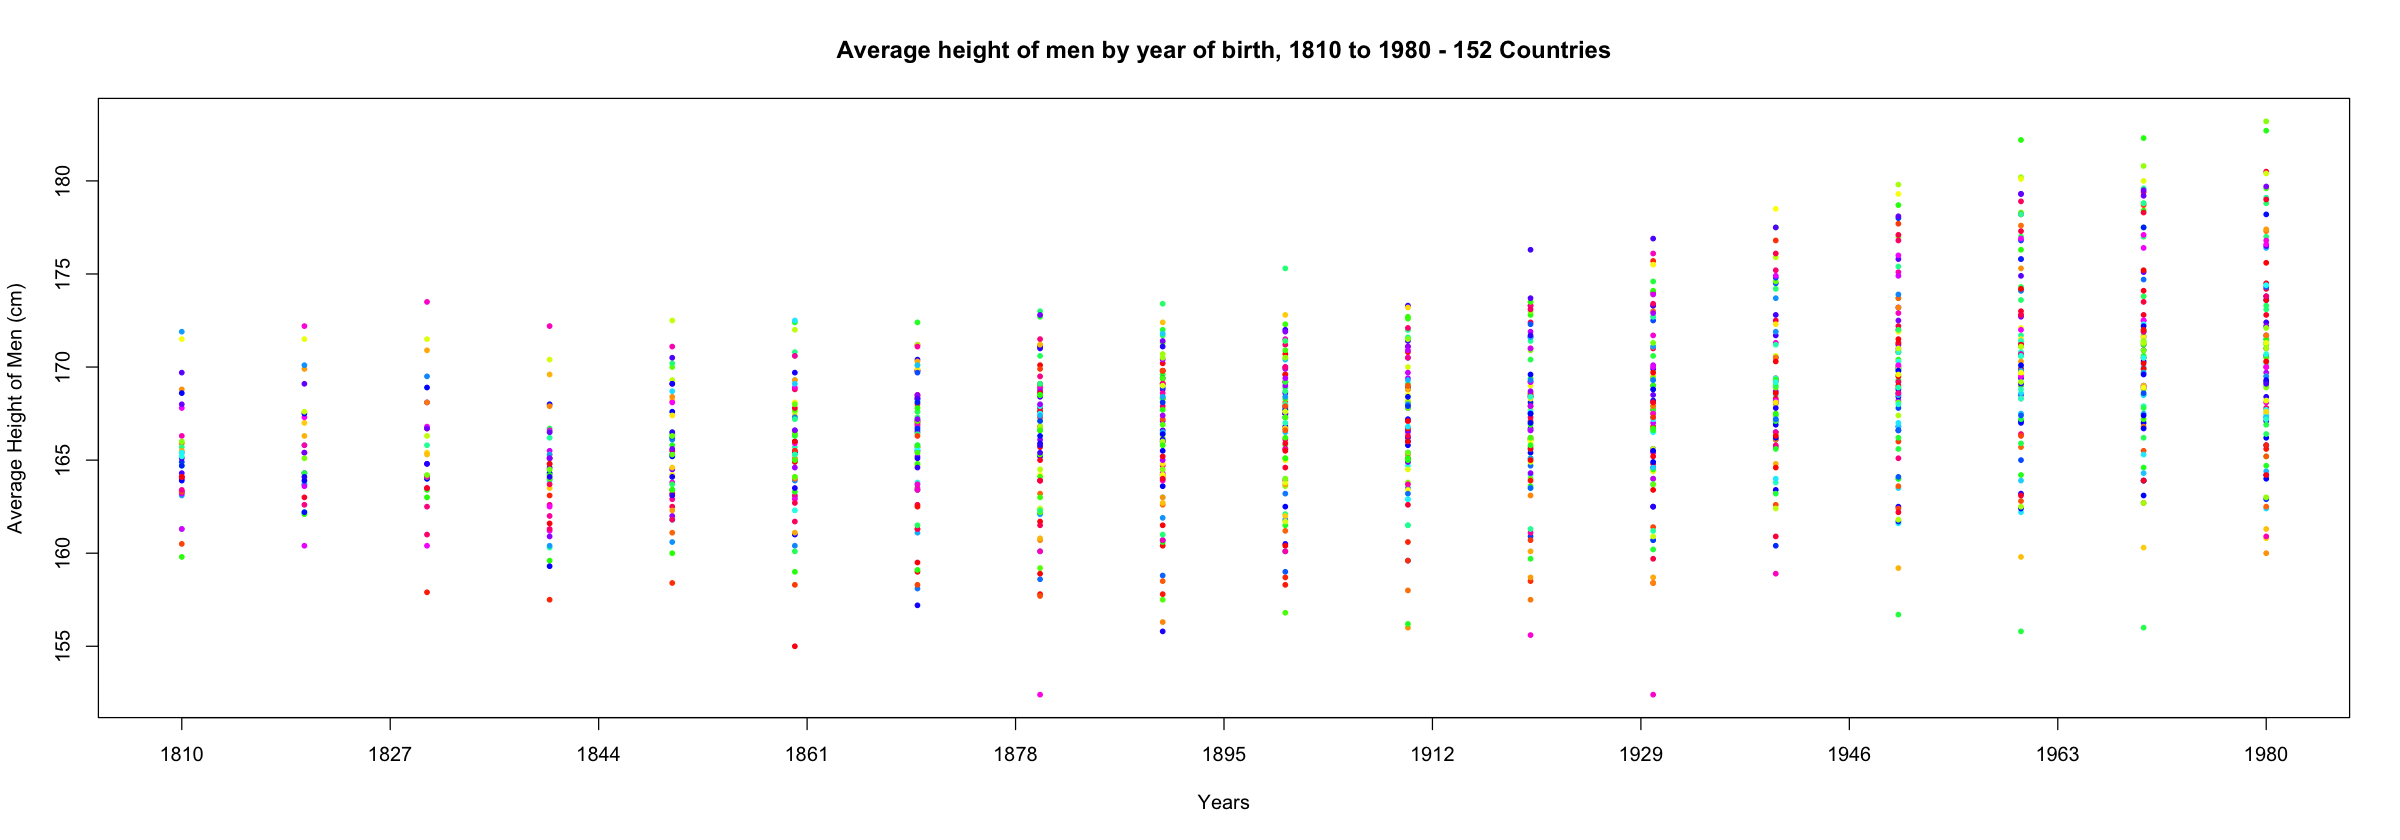

In [229]:
options(repr.plot.width= 20, repr.plot.height= NULL)

countries = length(unique(height_data$Entity))
plot(height_data$Year, height_data$Heights, xlim = c(1810, 1980), xaxp = c(1810, 1980, 10),
     xlab = "Years", ylab = "Average Height of Men (cm)",
     main = "Average height of men by year of birth, 1810 to 1980 - 152 Countries",
     col = rainbow(countries),
     pch = 19, cex = 0.5)

In [62]:
options(repr.plot.width= NULL, repr.plot.height= NULL)

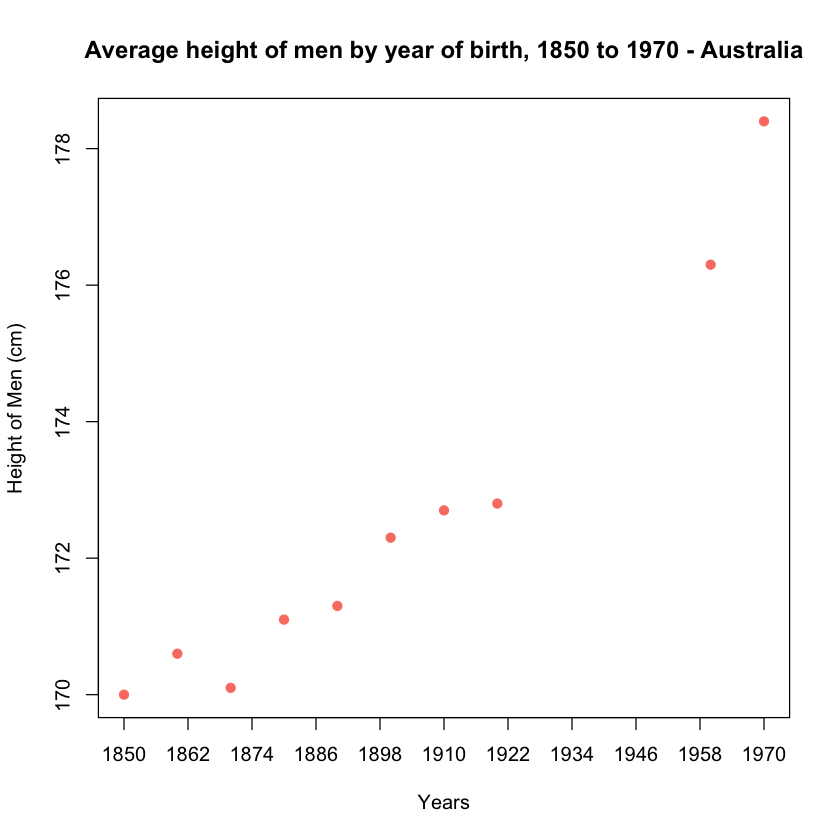

In [63]:
plot(height_data$Year[height_data$Entity == "Australia"], height_data$Heights[height_data$Entity == "Australia"], 
     xlim = c(1850, 1970), xaxp = c(1850, 1970, 10),
     xlab = "Years", ylab = "Height of Men (cm)",
     main = "Average height of men by year of birth, 1850 to 1970 - Australia",
     col = 'salmon',
     pch = 19)

In [28]:
# Extract data for Australia
aus_data <- subset(height_data, height_data$Entity == "Australia")
aus_data

,Entity,Code,Year,Heights
,<chr>,<chr>,<int>,<dbl>
41,Australia,AUS,1850,170.0
42,Australia,AUS,1860,170.6
43,Australia,AUS,1870,170.1
44,Australia,AUS,1880,171.1
45,Australia,AUS,1890,171.3
46,Australia,AUS,1900,172.3
47,Australia,AUS,1910,172.7
48,Australia,AUS,1920,172.8
49,Australia,AUS,1960,176.3


In [30]:
height_mean_original <- mean(aus_data$Heights)
height_mean_original

[1] 172.56

 ### _Next Steps_

- Adding male population to the aus_data dataset.
- The mean height during these intervals indicate the mean height of the population.

- The dataset "years.csv" has data from the year 1900. However, our original data has height information starting from 1850.
- If a better dataset with population data from 1850 is not found we may proceed with "years.csv"

In [71]:
aus_pop_data <- read.csv("years.csv")
aus_pop_data[aus_pop_data$Year >= 1900 & aus_pop_data$Year <= 1970, ]

,Year,Population
,<int>,<int>
1,1901,1978091
2,1911,2313035
3,1921,2771900
4,1922,2831500
5,1923,2898800
6,1924,2961500
7,1925,3031100
8,1926,3091500
9,1927,3158800


In [73]:
ausdata <- aus_data
auspopdata <- aus_pop_data

In [76]:
install.packages("zoo")


The downloaded binary packages are in
	/var/folders/yz/2q6jdys179d8sg7y3qh6d8740000gn/T//RtmpFb7ayh/downloaded_packages


In [77]:
library(zoo)

# Convert the Year column to character in both dataframes
ausdata$Year <- as.character(ausdata$Year)
auspopdata$Year <- as.character(auspopdata$Year)

# Merge the dataframes based on the nearest year
merged_df <- merge(ausdata, auspopdata, by = "Year", all.x = TRUE)

# Fill missing population values with the nearest year
merged_df$Population <- zoo::na.locf(merged_df$Population)

# Print the merged dataframe
print(merged_df)



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




   Year    Entity Code Heights Population
1  1850 Australia  AUS   170.0    5192300
2  1860 Australia  AUS   170.6    6291977
3  1870 Australia  AUS   170.1    5192300
4  1880 Australia  AUS   171.1    6291977
5  1890 Australia  AUS   171.3    5192300
6  1900 Australia  AUS   172.3    6291977
7  1910 Australia  AUS   172.7    5192300
8  1920 Australia  AUS   172.8    6291977
9  1960 Australia  AUS   176.3    5192300
10 1970 Australia  AUS   178.4    6291977


In [78]:
merged_df

Year,Entity,Code,Heights,Population
<chr>,<chr>,<chr>,<dbl>,<int>
1850,Australia,AUS,170.0,5192300
1860,Australia,AUS,170.6,6291977
1870,Australia,AUS,170.1,5192300
1880,Australia,AUS,171.1,6291977
1890,Australia,AUS,171.3,5192300
1900,Australia,AUS,172.3,6291977
1910,Australia,AUS,172.7,5192300
1920,Australia,AUS,172.8,6291977
1960,Australia,AUS,176.3,5192300


### Merging Population Data

#### A better dataset with population data from 1850 is found. It is contained in "pop_data.csv".
##### _Sources:_
- Australian Bureau of Statistics 2010, Australian Demographic Statistics, Sep 2009, Cat.no. 3101.0, Australian Bureau of Statistics, Canberra, viewed 25th March, 2010, <http://www.abs.gov.au>.
- Australian Bureau of Statistics 2008, Australian Historical Population Statistics, 2008, Cat.no. 3105.0.65.001, Australian Bureau of Statistics, Canberra, viewed 10th August, 2009, <http://www.abs.gov.au>.
- Australian Bureau of Statistics 2008, Australian Demographic Statistics, Dec 2008, Cat.no. 3101.0, Australian Bureau of Statistics, Canberra, viewed 10th August, 2009, <http://www.abs.gov.au>.
- http://chartsbin.com/view/eoo

In [82]:
population <- read.csv("pop_dat.csv")
head(population)
tail(population)

,Year,Persons,Male
,<chr>,<chr>,<chr>
1,01/09/2009,"22,065,671","10,987,127"
2,01/12/2008,"21,722,820","10,811,876"
3,01/12/2007,"21,263,271","10,572,793"
4,01/12/2006,"20,873,663","10,371,462"
5,01/12/2005,"20,544,064","10,203,169"
6,01/12/2004,"20,252,132","10,055,192"


,Year,Persons,Male
,<chr>,<chr>,<chr>
205,Dec-1805,"7,707","5,395"
206,Dec-1804,"7,598","5,313"
207,Dec-1803,"7,238","5,185"
208,Dec-1802,"7,014","5,208"
209,Dec-1801,"5,945","4,372"
210,Dec-1800,"5,217","3,780"


In [83]:
pop2 <- population

In [84]:
pop2$Year <- substr(pop2$Year, nchar(pop2$Year) - 3, nchar(pop2$Year))

In [100]:
pop2[pop2$Year == 1850, ]

,Year,Persons,Male
,<chr>,<chr>,<chr>
160,1850,"405,356","238,683"


In [103]:
#merging the population data from pop2 to corresponding years from ausdata.
pop_test <- pop2 #dummy df

merged_data <- merge(ausdata, pop_test, by = "Year")
merged_data

Year,Entity,Code,Heights,Persons,Male
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1850,Australia,AUS,170.0,"405,356","238,683"
1860,Australia,AUS,170.6,"1,145,585","668,560"
1870,Australia,AUS,170.1,"1,647,756","902,494"
1880,Australia,AUS,171.1,"2,231,531","1,204,514"
1890,Australia,AUS,171.3,"3,151,355","1,692,831"
1900,Australia,AUS,172.3,"3,765,339","1,976,992"
1910,Australia,AUS,172.7,"4,425,083","2,296,308"
1920,Australia,AUS,172.8,"5,411,297","2,751,730"
1960,Australia,AUS,176.3,"10,391,920","5,253,073"


In [ ]:
#height_data_by_year_population <- merge(aus_data, pop2, by = "Year")

In [119]:
# Rename columns for clarity
colnames(merged_data)[colnames(merged_data) == "Total Population"] <- "Total_Population"
colnames(merged_data)[colnames(merged_data) == "Male Population"] <- "Male_Population"

In [120]:
colnames(merged_data)

[1] "Year"             "Country"          "Code"             "Heights"         
[5] "Total_Population" "Male_Population"

In [230]:
merged_data

Year,Country,Code,Heights,Total_Population,Male_Population
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1850,Australia,AUS,170.0,405356,238683
1860,Australia,AUS,170.6,1145585,668560
1870,Australia,AUS,170.1,1647756,902494
1880,Australia,AUS,171.1,2231531,1204514
1890,Australia,AUS,171.3,3151355,1692831
1900,Australia,AUS,172.3,3765339,1976992
1910,Australia,AUS,172.7,4425083,2296308
1920,Australia,AUS,172.8,5411297,2751730
1960,Australia,AUS,176.3,10391920,5253073


In [126]:
merged_data$Total_Population <- as.numeric(gsub(',','', merged_data$Total_Population))
merged_data$Male_Population <- as.numeric(gsub(',','', merged_data$Male_Population))

In [127]:
str(merged_data)
summary(merged_data$Male_Population)

'data.frame':	10 obs. of  6 variables:
 $ Year            : chr  "1850" "1860" "1870" "1880" ...
 $ Country         : chr  "Australia" "Australia" "Australia" "Australia" ...
 $ Code            : chr  "AUS" "AUS" "AUS" "AUS" ...
 $ Heights         : num  170 171 170 171 171 ...
 $ Total_Population: num  405356 1145585 1647756 2231531 3151355 ...
 $ Male_Population : num  238683 668560 902494 1204514 1692831 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 238683  977999 1834912 2335006 2637874 6364877 

### Data Visualization
#### Histogram of Heights

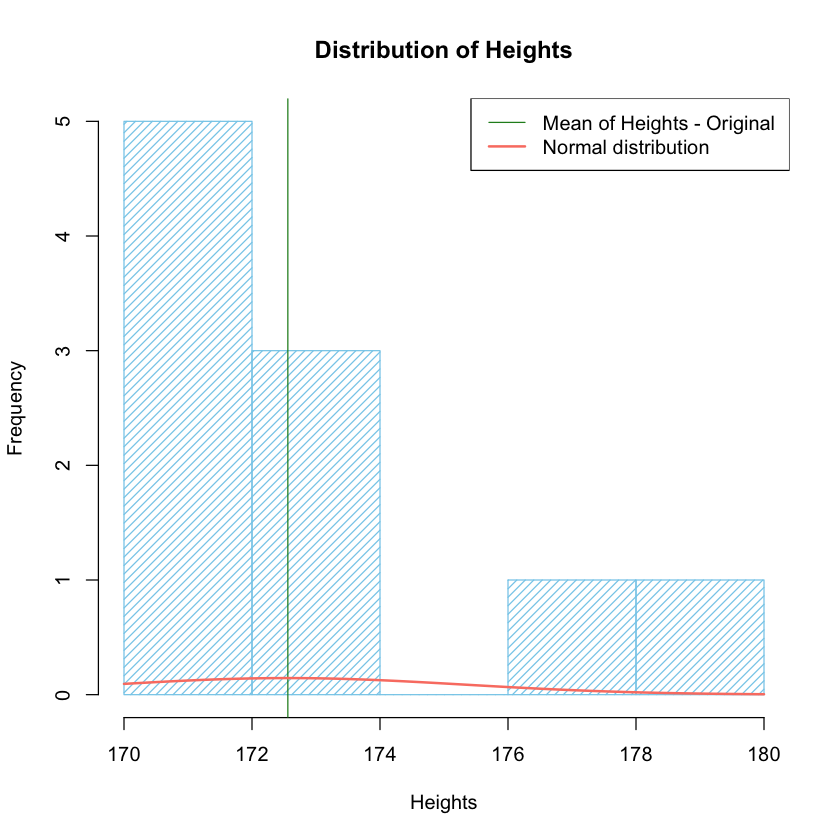

In [418]:
options(repr.plot.width= NULL, repr.plot.height= NULL)

hist(merged_data$Heights, density = 20, col = 'skyblue', main = "Distribution of Heights", xlab = "Heights")
hts <- merged_data$Heights

abline(v = height_mean_original, col = "forestgreen", lty = 1)

# Estimate density function
dens <- density(hts)

# Plot normal distribution curve
curve(dnorm(x, mean = mean(hts), sd = sd(hts)), 
      col = "salmon", lwd = 2, add = TRUE, yaxt = "n")

# Add legend
legend("topright", legend = c("Mean of Heights - Original", "Normal distribution"),
       col = c("forestgreen", "salmon"), lwd = c(1, 2), lty = c(1, 1))


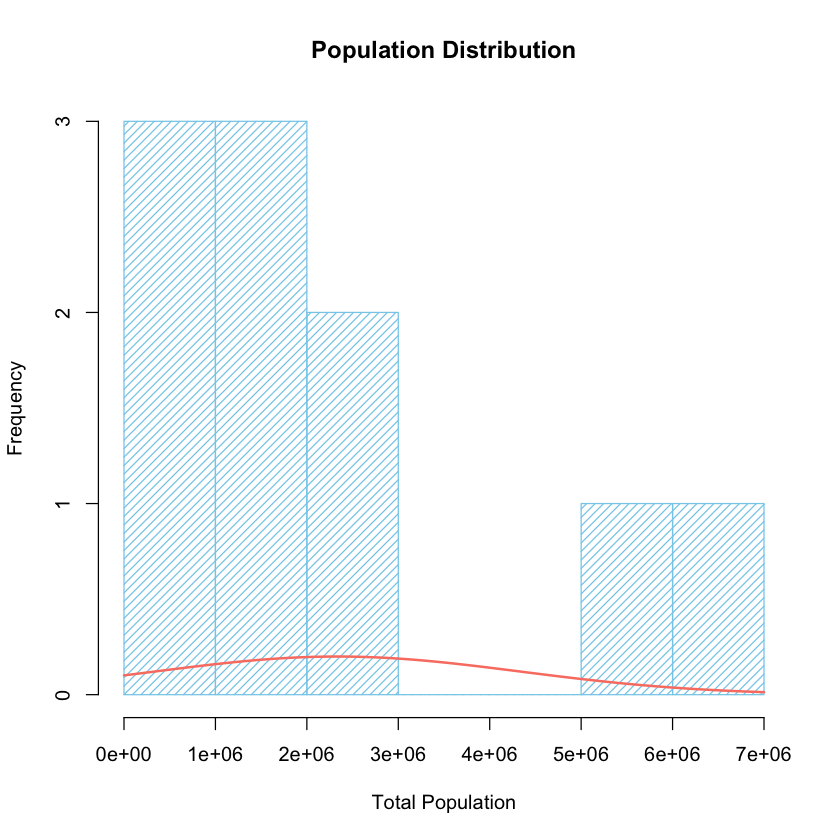

In [419]:
hist(merged_data$Male_Population, 
     main = "Population Distribution",
     xlab = "Total Population",
     ylab = "Frequency",
     col = "skyblue", 
     density = 20)

m_pop <- merged_data$Male_Population
binwidth <- diff(hist(merged_data$Male_Population, plot = FALSE)$breaks)[1]
curve(dnorm(x, mean = mean(m_pop), sd = sd(m_pop)) * binwidth, 
      col = "salmon", lwd = 2, add = TRUE, yaxt = "n")

In [420]:
merged_data

Year,Country,Code,Heights,Total_Population,Male_Population
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1850,Australia,AUS,170.0,405356,238683
1860,Australia,AUS,170.6,1145585,668560
1870,Australia,AUS,170.1,1647756,902494
1880,Australia,AUS,171.1,2231531,1204514
1890,Australia,AUS,171.3,3151355,1692831
1900,Australia,AUS,172.3,3765339,1976992
1910,Australia,AUS,172.7,4425083,2296308
1920,Australia,AUS,172.8,5411297,2751730
1960,Australia,AUS,176.3,10391920,5253073


### Data Analysis
### Calculating Mean Heights
- For a selected sample interval. Not random. We will develop a function that takes a given number of random intervals and calculate ther respective means and sds and finally compare them against the original data in the next phase.

[1] "The mean height from the original data is : 172.56"
[1] "The mean height from the sampled data is : 171.566666666667"


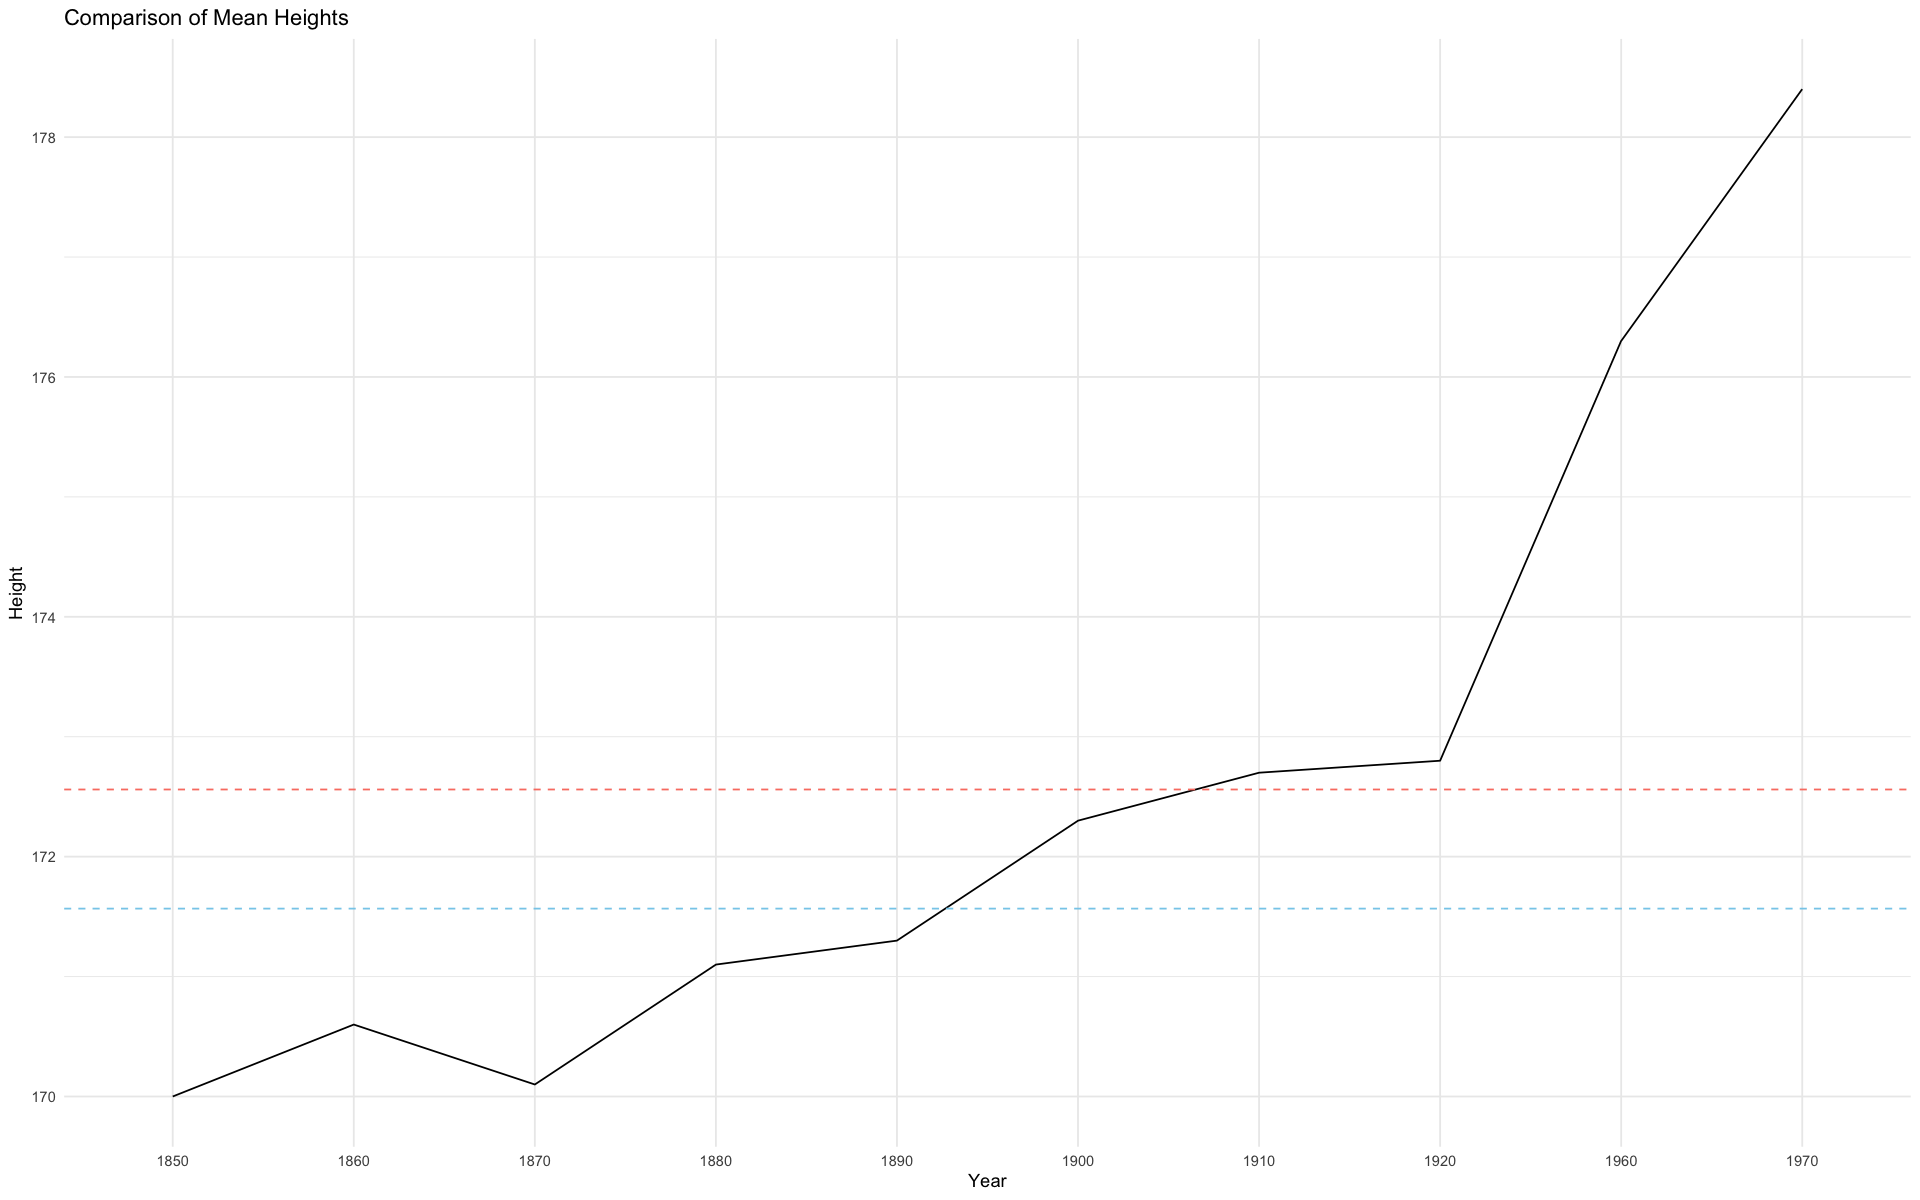

In [422]:
options(repr.plot.width= 16, repr.plot.height= 10)
#Calculate Mean Height
# Calculate the mean height for the entire period (1850-1970)
mean_height_original <- mean(merged_data$Heights)
sd_height_original <- sd(merged_data$Heights)
print(paste("The mean height from the original data is :", mean_height_original))

#Sampling
# Sample a smaller period (e.g., 10-15 years)
# Calculate the mean height for the sampled period
sample_data <- subset(merged_data, Year >= 1880 & Year <= 1900)
sample_mean <- mean(sample_data$Heights)
print(paste("The mean height from the sampled data is :", sample_mean))

# Plotting
library(ggplot2)

#aes(x = Year, y = Heights, group = 1), width = 10, height = 6)

# Plotting
ggplot(data = merged_data, aes(x = Year, y = Heights, group = 1)) +
  geom_line() +  # Connect points with a line
  geom_hline(yintercept = mean_height_original, color = "salmon", linetype = "dashed") +
  geom_hline(yintercept = sample_mean, color = "skyblue", linetype = "dashed") +
  labs(title = "Comparison of Mean Heights",
       x = "Year",
       y = "Height") +
  theme_minimal() +
  scale_color_manual(values = c("salmon", "skyblue"),
                     labels = c("Mean Height - Original", "Sample Mean")) 


## Sample Mean Comparison Function

The `sample_mean_comparison` function is designed to explore the Law of Large Numbers by comparing the mean and standard deviation of a randomly sampled subset of data with the actual values from the entire dataset.

### Function Parameters

- `number_of_years_to_be_sampled` (integer): Specifies the number of years to be randomly sampled from the dataset.

### Function Details

The `sample_mean_comparison` function performs the following steps:

1. Randomly selects a specified number of years from the `merged_data` dataset using the `sample()` function without replacement.
2. Subsets the `merged_data` dataset based on the sampled years using the `subset()` function.
3. Calculates the mean height and standard deviation of the sampled data using the `mean()` and `sd()` functions, respectively.
4. Creates a data frame `sample_vs_original` to compare the sample mean, actual mean height, sample standard deviation, and actual heights standard deviation.
5. Generates a line plot using `ggplot2` to visually compare the mean heights of the sampled data and the entire dataset over time.
   - The plot includes horizontal lines representing the sample mean and the actual mean height for easy comparison.
   - The plot has a minimalistic theme and sets the y-axis limits for better visibility.
6. Returns the `sample_vs_original` data frame containing the comparison results.

### Usage Example

To use the `sample_mean_comparison` function, simply call it with the desired number of years to be sampled:

```R
sample_mean_comparison(5)
```

This will randomly sample 5 years from the `merged_data` dataset, calculate the sample mean and standard deviation, create a comparison data frame, generate a line plot, and return the comparison results.

### Function Output

The `sample_mean_comparison` function returns a data frame `sample_vs_original` with the following columns:

- `Sample Mean`: The mean height calculated from the sampled data.
- `Actual Mean Height`: The actual mean height calculated from the entire dataset.
- `Sample Standard Deviation`: The standard deviation of heights calculated from the sampled data.
- `Actual Heights Standard Deviation`: The actual standard deviation of heights calculated from the entire dataset.

Additionally, the function generates a line plot that visually compares the mean heights of the sampled data and the entire dataset over time.

### Requirements

To use the `sample_mean_comparison` function, make sure you have the `ggplot2` package installed and loaded. You can install it by running `install.packages("ggplot2")` and load it with `library(ggplot2)`.

Also, ensure that you have set the appropriate plot width and height using `options(repr.plot.width = 12, repr.plot.height = 8)` before running the function.

---


In [423]:
#' Sample Mean Comparison
#'
#' This function randomly samples a specified number of years from the merged_data dataset and compares the mean height
#' of the sampled data with the actual mean height of the entire dataset. It also calculates the standard deviation of
#' the sampled data and compares it with the standard deviation of the entire dataset.
#'
#' @param number_of_years_to_be_sampled An integer specifying the number of years to be randomly sampled.
#'
#' @return A data frame containing the sample mean, actual mean height, sample standard deviation, and actual heights standard deviation.
#'
#' @details The function performs the following steps:
#' 1. Randomly samples the specified number of years from the 'Year' column of the merged_data dataset without replacement. 
#'(It can take any values between 1 and 10)
#' 2. Subsets the merged_data dataset based on the sampled years.
#' 3. Calculates the mean height and standard deviation of the sampled data.
#' 4. Creates a data frame comparing the sample mean, actual mean height, sample standard deviation, and actual heights standard deviation.
#' 5. Plots a line graph comparing the mean heights of the sampled data and the entire dataset over time.
#' 6. Returns the data frame with the comparison results.
#'
#' @examples
#' sample_mean_comparison(5)
#'
#' @import ggplot2
#'
#' @note Fell free to set the appropriate plot width and height using options (example: repr.plot.width = 12, repr.plot.height = 8) 
#'before running the function.
#'

sample_mean_comparison <- function(number_of_years_to_be_sampled) {
  # Get the total number of unique years in the dataset
  total_years <- length(unique(merged_data$Year))
  
  # Check if the number of years to be sampled exceeds the total number of unique years
  if (number_of_years_to_be_sampled > total_years) {
    stop(paste("The number of years to be sampled cannot exceed the total number of unique years in the dataset, which is", total_years))
  }
  
  # Randomly sample the specified number of years from the 'Year' column of merged_data without replacement
  years <- sample(merged_data$Year, number_of_years_to_be_sampled, replace = FALSE)
  
  # Subset the merged_data dataset based on the sampled years
  sample_data <- subset(merged_data, Year >= min(years) & Year <= max(years))
  
  # Calculate the mean height and standard deviation of the sampled data
  sample_mean <- mean(sample_data$Heights)
  sample_sd <- sd(sample_data$Heights)
  
  # Create a data frame comparing the sample mean, actual mean height, sample standard deviation, and actual heights standard deviation
  sample_vs_original <- data.frame("Sample Mean" = sample_mean, "Actual Mean Height" = mean_height_original,
                                   "Sample Standard Deviation" = sample_sd, "Actual Heights Standard Deviation" = sd_height_original)
  
  # Create a line plot comparing the mean heights of the sampled data and the entire dataset over time
  plt <- ggplot(data = merged_data, aes(x = Year, y = Heights, group = 1), width = 8, height = 10) +
    geom_line(color = "maroon") + # Connect points with a line
    geom_hline(aes(yintercept = mean_height_original, color = "Mean Height - Original"), linetype = "dashed") +
    geom_hline(aes(yintercept = sample_mean, color = "Sample Mean"), linetype = "dashed") +
    labs(title = "Comparison of Mean Heights",
         x = "Year",
         y = "Height") +
    theme_minimal() +
    coord_cartesian(ylim = c(170, 180)) + # Set y-axis limits
    scale_color_manual(values = c("Mean Height - Original" = "salmon", "Sample Mean" = "skyblue"),
                       labels = c("Mean Height - Original" = "Mean Height - Original", "Sample Mean" = "Sample Mean"))
  
  # Print the plot
  print(plt)
  
  # Return the data frame with the comparison results
  return(sample_vs_original)
    
}

Sample.Mean,Actual.Mean.Height,Sample.Standard.Deviation,Actual.Heights.Standard.Deviation
<dbl>,<dbl>,<dbl>,<dbl>
173.5571,172.56,2.738526,2.75689


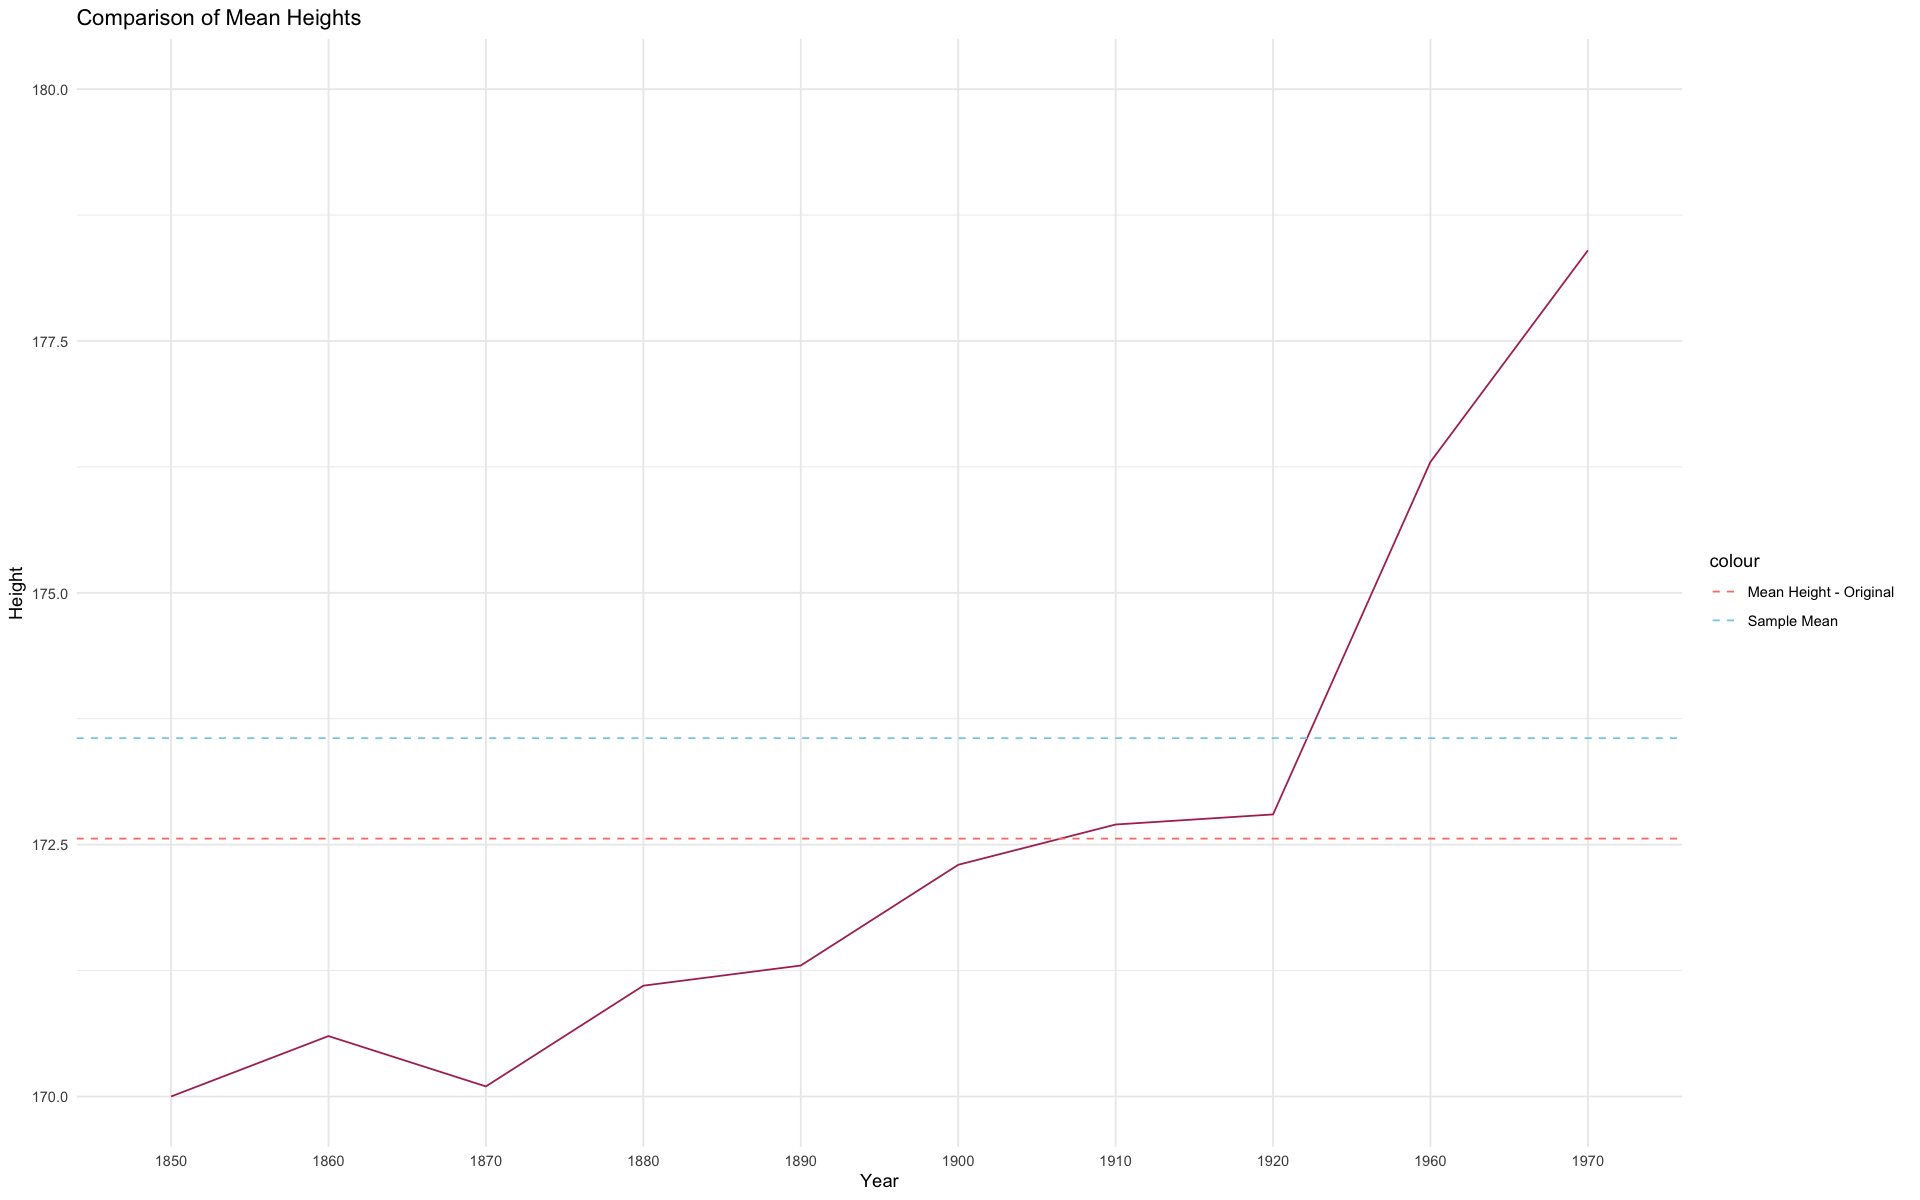

In [424]:
sample_mean_comparison(2)

Sample.Mean,Actual.Mean.Height,Sample.Standard.Deviation,Actual.Heights.Standard.Deviation
<dbl>,<dbl>,<dbl>,<dbl>
173.08,172.56,1.895257,2.75689


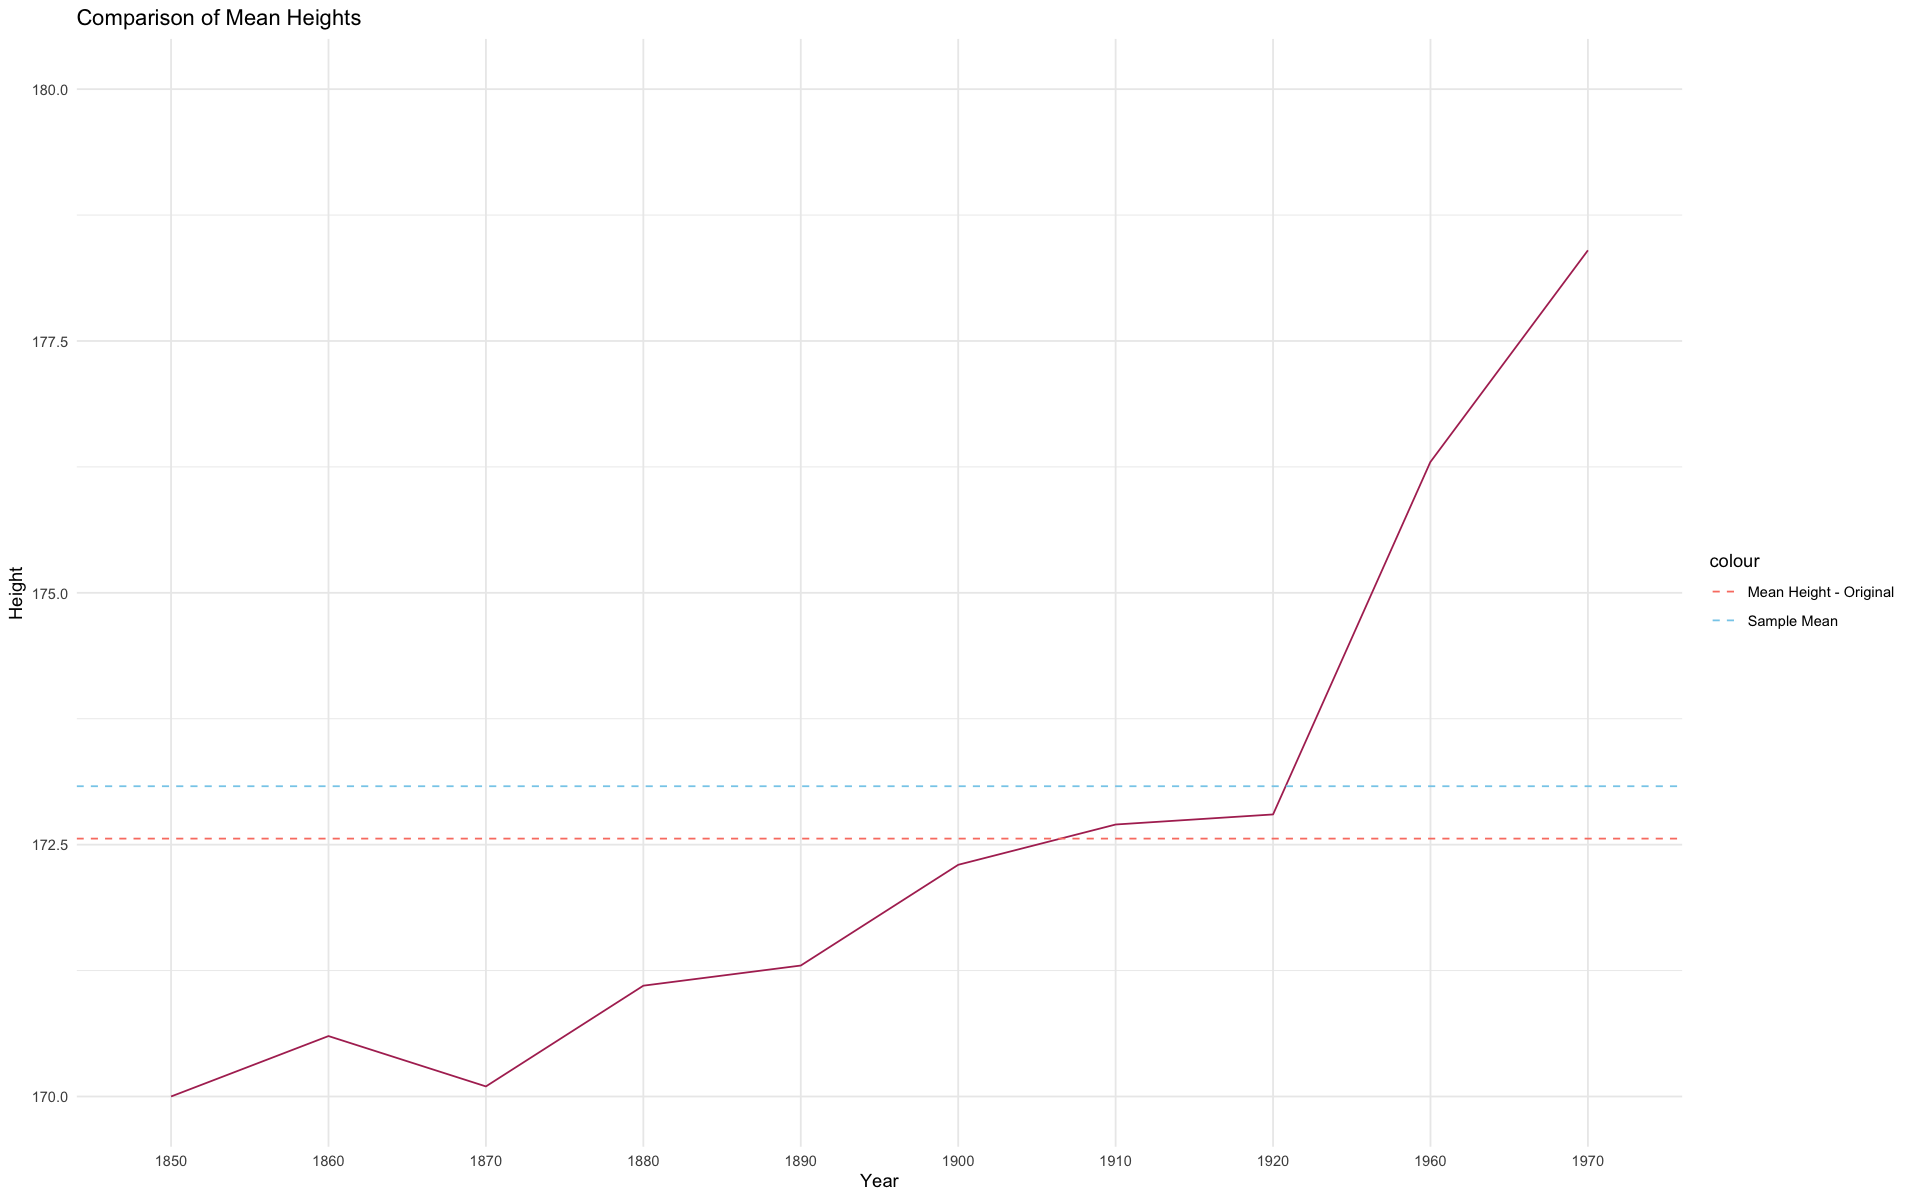

In [425]:
sample_mean_comparison(3)

Sample.Mean,Actual.Mean.Height,Sample.Standard.Deviation,Actual.Heights.Standard.Deviation
<dbl>,<dbl>,<dbl>,<dbl>
172.15,172.56,1.942017,2.75689


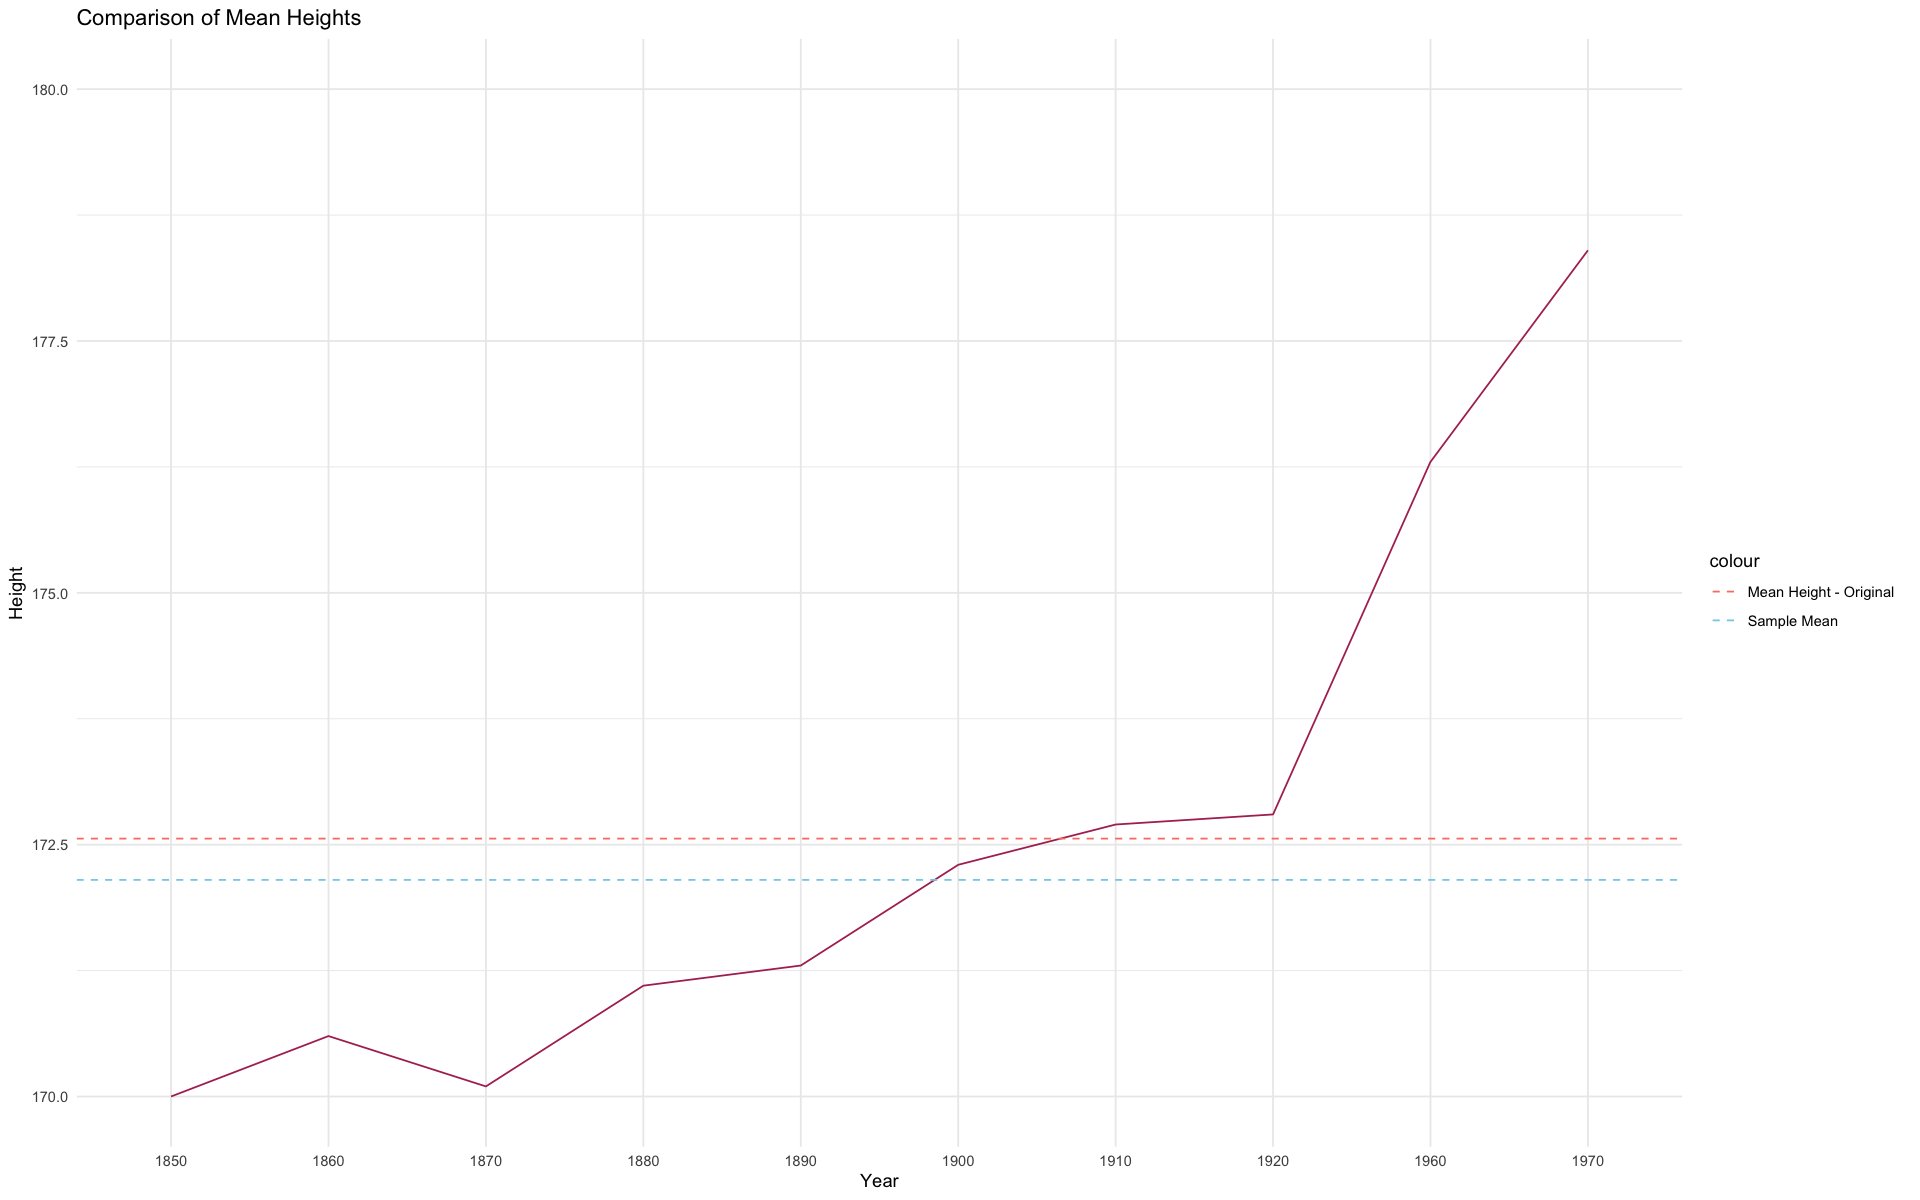

In [426]:
sample_mean_comparison(5)

Sample.Mean,Actual.Mean.Height,Sample.Standard.Deviation,Actual.Heights.Standard.Deviation
<dbl>,<dbl>,<dbl>,<dbl>
171.3625,172.56,1.12369,2.75689


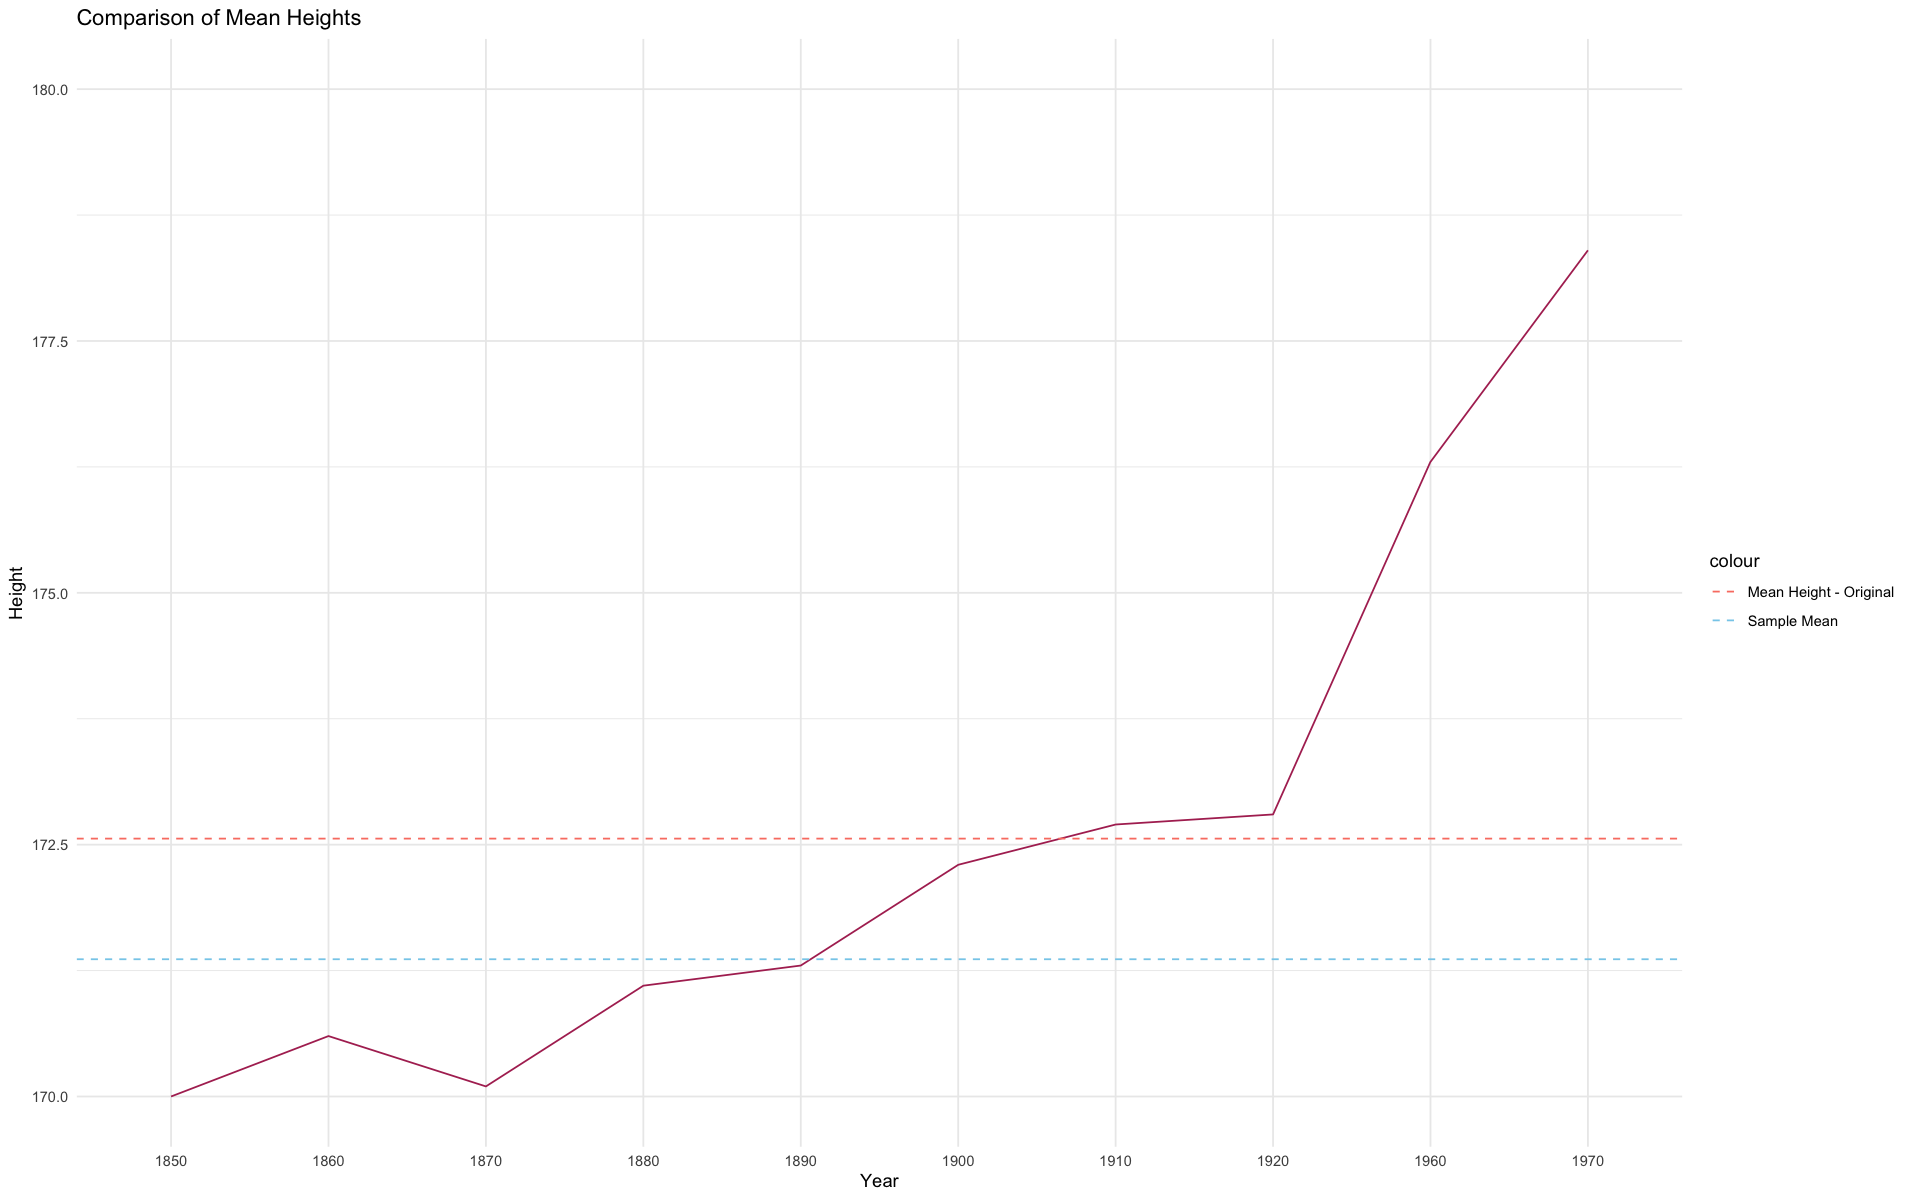

In [427]:
sample_mean_comparison(7)

Sample.Mean,Actual.Mean.Height,Sample.Standard.Deviation,Actual.Heights.Standard.Deviation
<dbl>,<dbl>,<dbl>,<dbl>
172.56,172.56,2.75689,2.75689


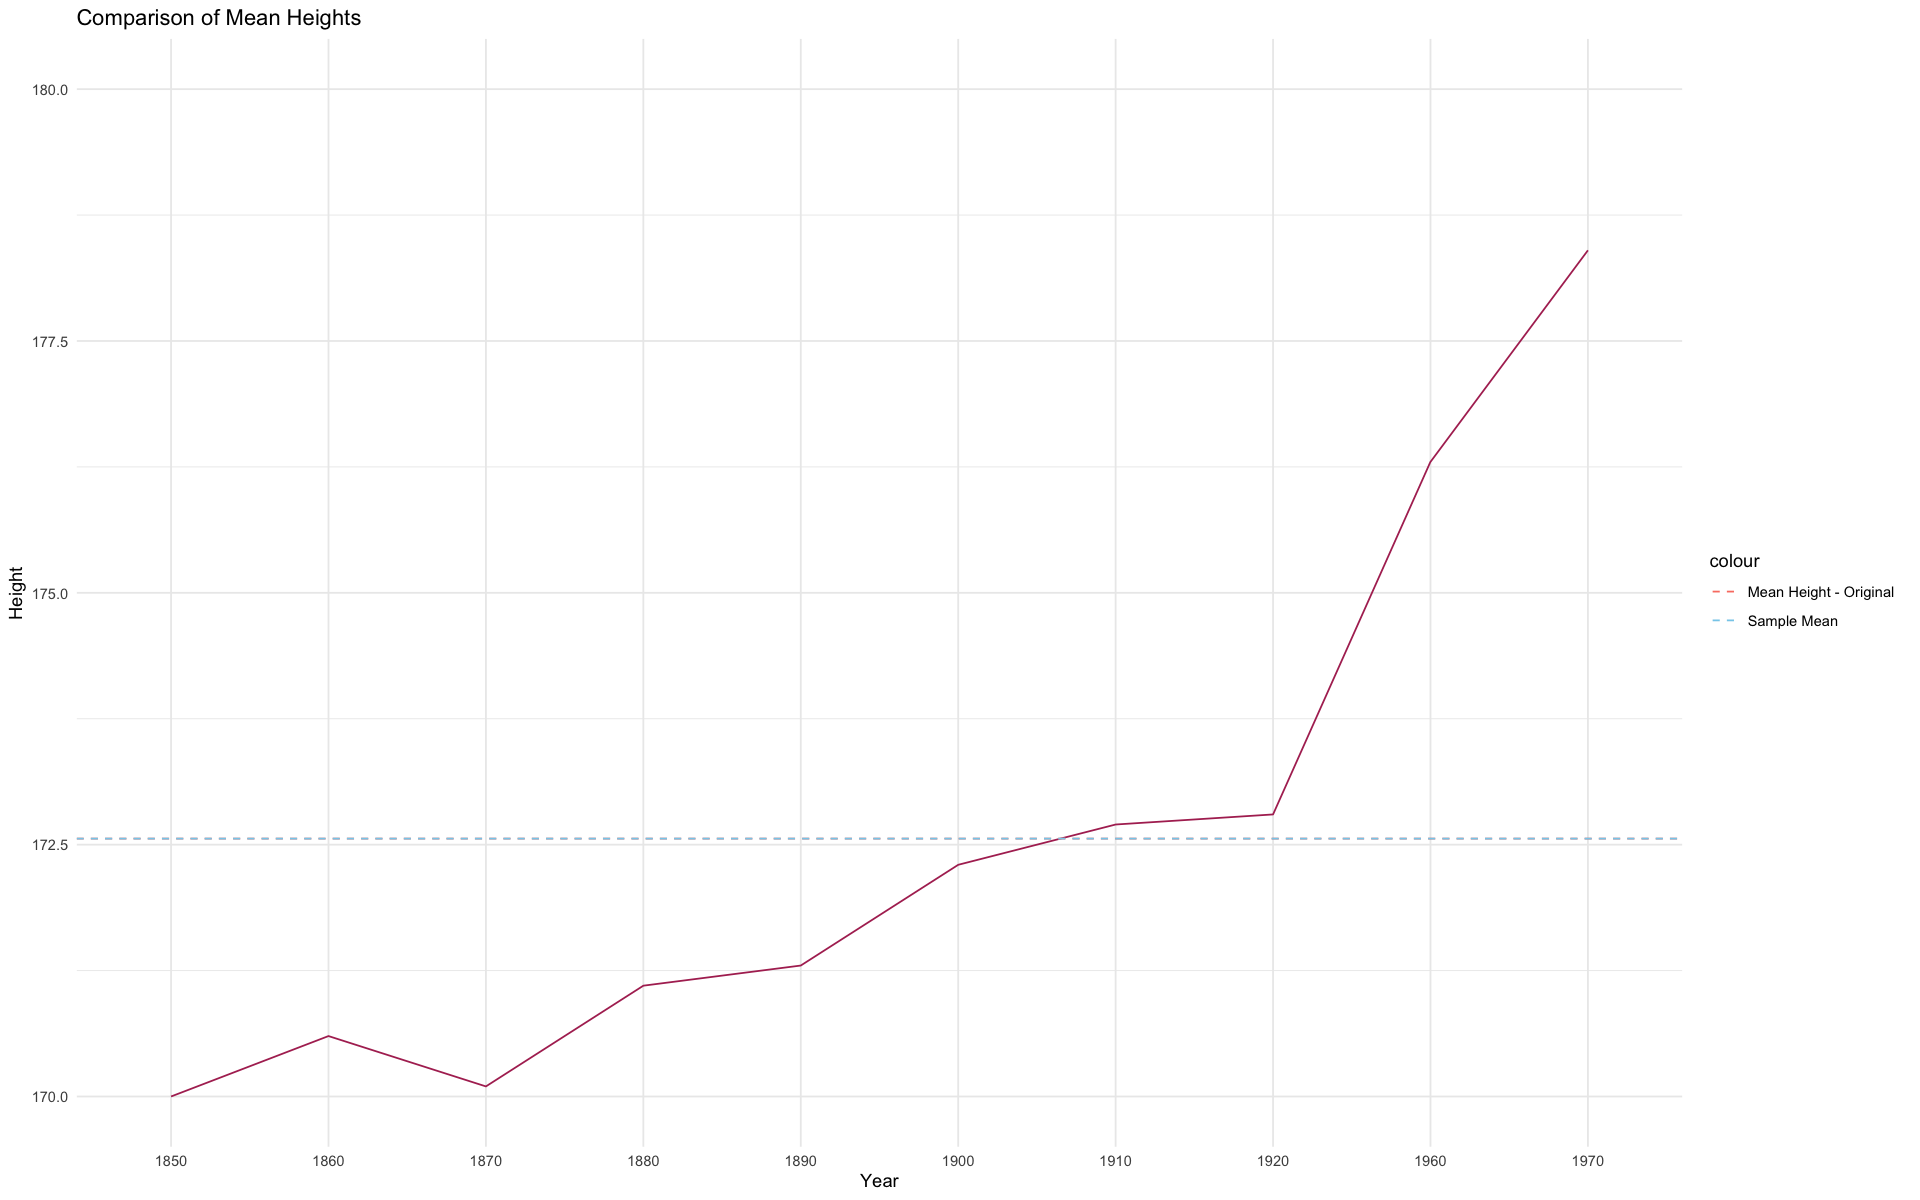

In [428]:
sample_mean_comparison(8)

[1] "The mean height from the original data is : 172.56"
[1] "The mean height from the sample data is : 171.566666666667"


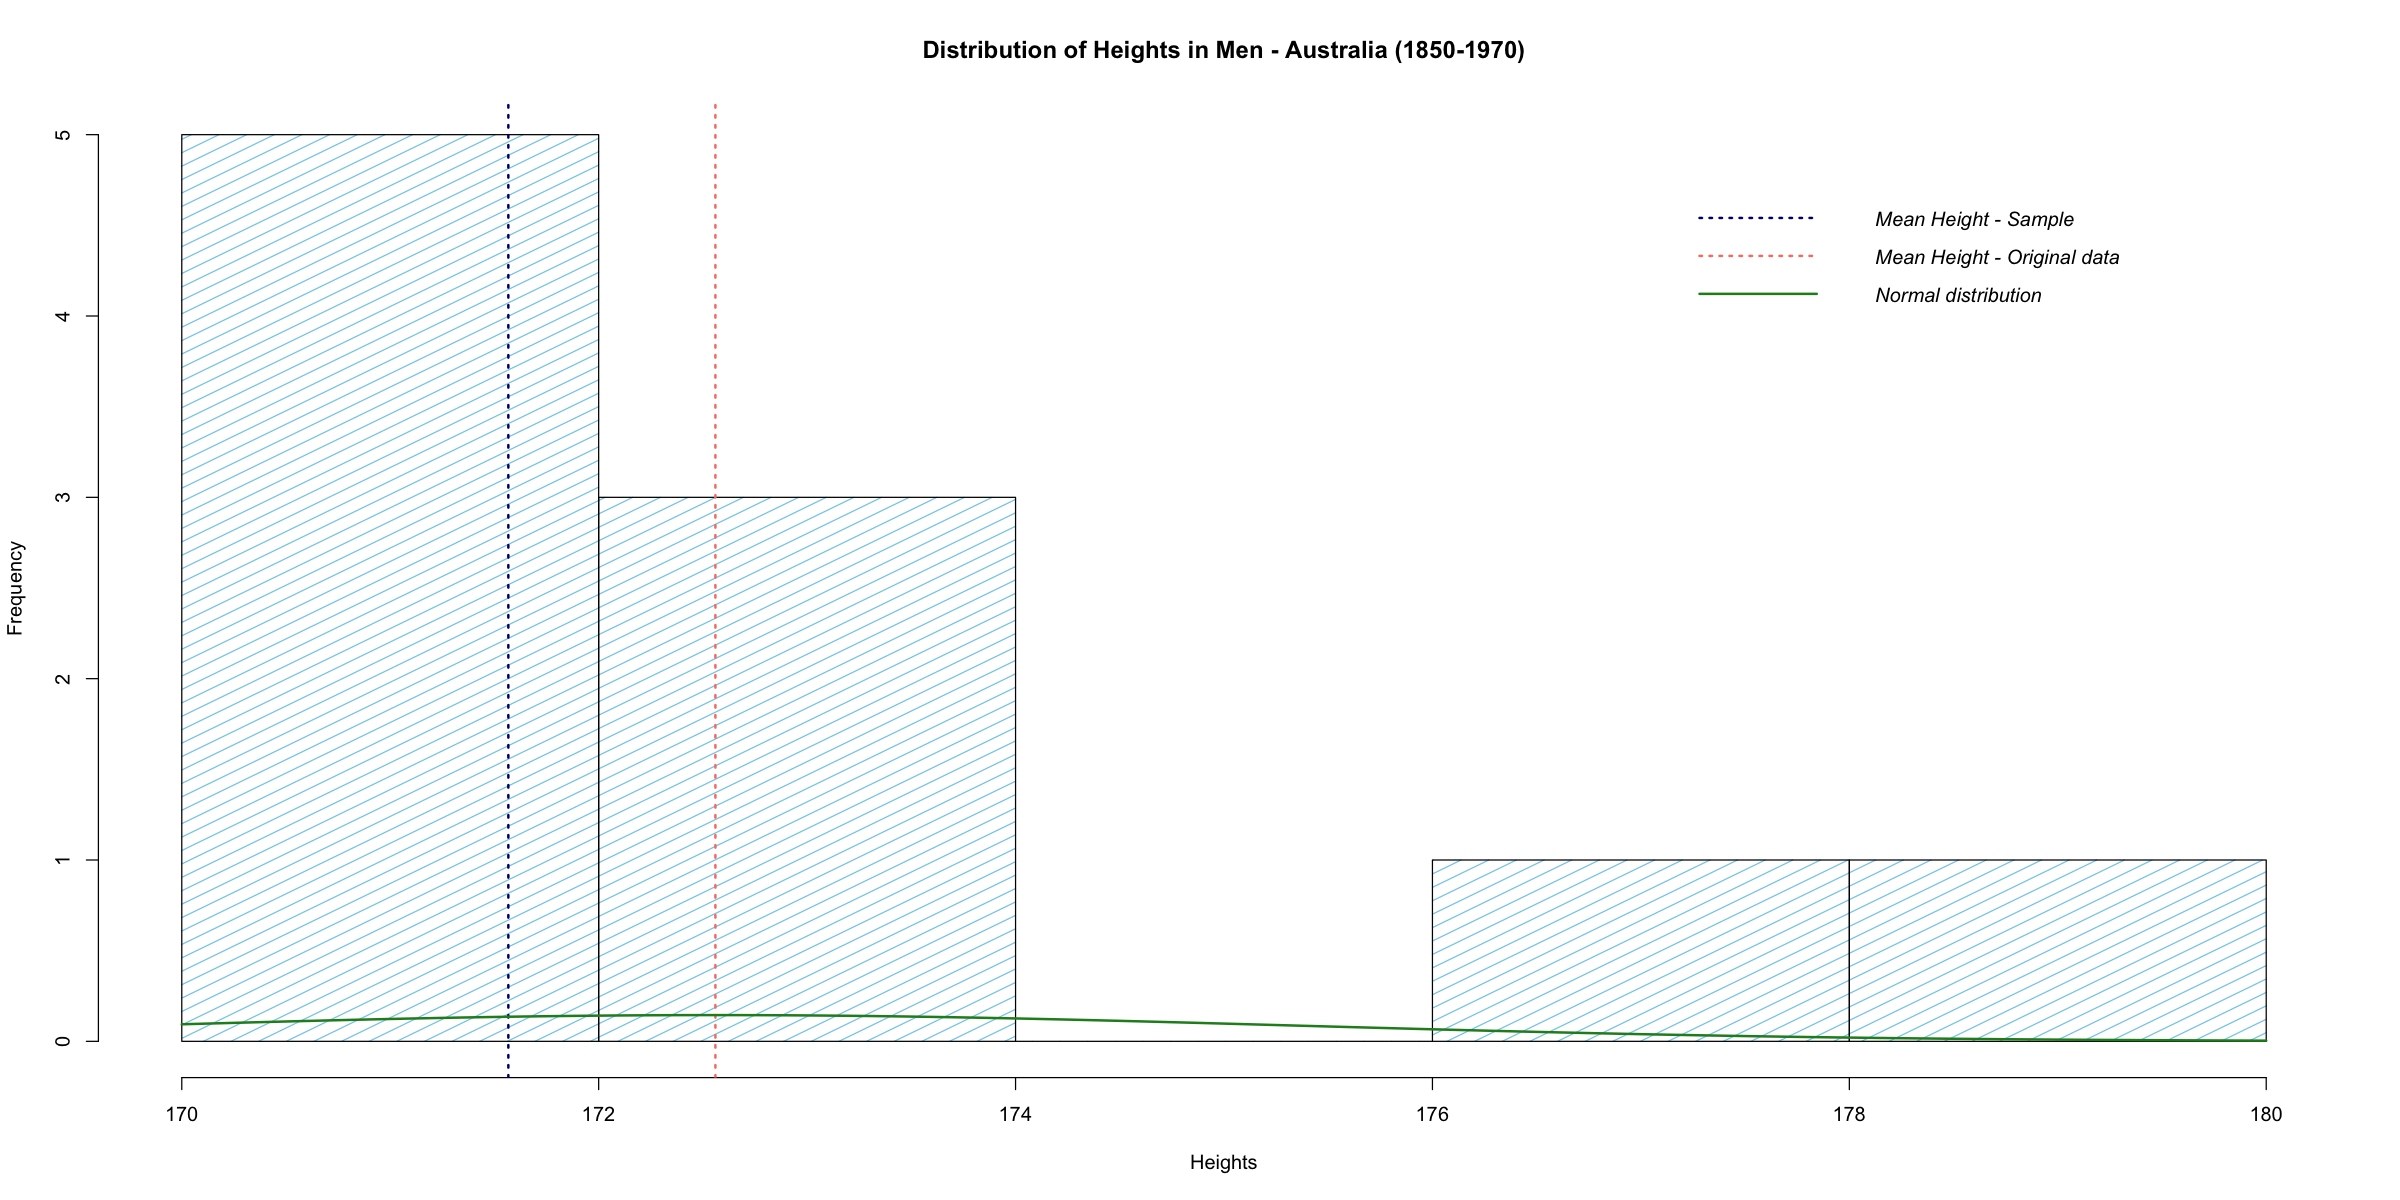

In [429]:
options(repr.plot.width= 20, repr.plot.height= 10)

hist(merged_data$Heights, density = 20, col = "skyblue", 
         main = "Distribution of Heights in Men - Australia (1850-1970)",
         xlab = "Heights",
         ylab = "Frequency",
         border = "black")
hts <- merged_data$Heights

abline(v = mean_height_original, col = "salmon", lty = 'dotted', lwd = 2)
abline(v = sample_mean, col = "navyblue", lty = 'dotted', lwd = 2)

# Estimate density function
dens <- density(hts)

# Plot normal distribution curve
curve(dnorm(x, mean = mean(hts), sd = sd(hts)), 
      col = "forestgreen", lwd = 2, add = TRUE, yaxt = "n")

# Add legend
legend(x = 177, y = 4.75, box.lwd = 0, legend = c("Mean Height - Sample" ,"Mean Height - Original data", "Normal distribution"),
       col = c("navyblue" ,"salmon", "forestgreen"), lwd = c(2, 2), lty = c('dotted', 'dotted', 'solid'), text.font = 3)

print(paste("The mean height from the original data is :", mean_height_original))
print(paste("The mean height from the sample data is :", sample_mean))


## Conclusion
In this analysis, we explored the application of the Law of Large Numbers using a dataset of male heights in Australia from 1850 to 1970. We calculated the mean height for the entire period and compared it with the mean height of a smaller sampled period. The results showed that the sample mean was close to the original mean, demonstrating the convergence property of LLN as the sample size increases.

In [252]:
write.csv(merged_data, "heightlln.csv", row.names = FALSE)


In [254]:
data <- merged_data